# Explore here

In [20]:
import os
import pylast
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()



True

In [21]:
clientid = os.getenv('CLIENT_ID')
clientsecret = os.getenv('CLIENT_SECRET')

In [22]:

network = pylast.LastFMNetwork(
    api_key=clientid,
    api_secret=clientsecret
)


In [23]:
artist_name = "Drake"
artist = network.get_artist(artist_name)

In [24]:
top_tracks = artist.get_top_tracks(limit=10)
print(top_tracks)

[TopItem(item=pylast.Track('Drake', 'One Dance', pylast.LastFMNetwork('51b3b0d66326dc2e7bcbe10e5e4995f4', '268b148a098293bd8d76099018c491c4', '', '', '')), weight=21402256), TopItem(item=pylast.Track('Drake', 'Best I Ever Had', pylast.LastFMNetwork('51b3b0d66326dc2e7bcbe10e5e4995f4', '268b148a098293bd8d76099018c491c4', '', '', '')), weight=12071029), TopItem(item=pylast.Track('Drake', 'Passionfruit', pylast.LastFMNetwork('51b3b0d66326dc2e7bcbe10e5e4995f4', '268b148a098293bd8d76099018c491c4', '', '', '')), weight=26729203), TopItem(item=pylast.Track('Drake', "God's Plan", pylast.LastFMNetwork('51b3b0d66326dc2e7bcbe10e5e4995f4', '268b148a098293bd8d76099018c491c4', '', '', '')), weight=14155463), TopItem(item=pylast.Track('Drake', 'Hotline Bling', pylast.LastFMNetwork('51b3b0d66326dc2e7bcbe10e5e4995f4', '268b148a098293bd8d76099018c491c4', '', '', '')), weight=11960059), TopItem(item=pylast.Track('Drake', 'Forever', pylast.LastFMNetwork('51b3b0d66326dc2e7bcbe10e5e4995f4', '268b148a098293bd

In [25]:
rows = []

for track_obj, weight_obj in top_tracks:
    track_name = track_obj.get_title()

    # popularity proxies
    playcount = track_obj.get_playcount()
    listeners = track_obj.get_listener_count()

    # duration in milliseconds (may be None or 0)
    duration_ms = track_obj.get_duration() or 0

    rows.append({
        "track_name": track_name,
        "playcount": int(playcount) if playcount is not None else 0,
        "listeners": int(listeners) if listeners is not None else 0,
        "duration_ms": int(duration_ms),
        "duration_min": (int(duration_ms) / 60000) if duration_ms else None
    })

df = pd.DataFrame(rows)
df

WSError: Connection to the API failed with HTTP code 502

In [ ]:
df_sorted = df.sort_values("listeners", ascending=True)
print(df_sorted.head(3))


                      track_name  playcount  listeners  duration_ms  \
9                           Over    6471160     987306       159000   
8  Jimmy Cooks (feat. 21 Savage)   17071575    1010151       218000   
7                      Headlines   14586116    1092529       235000   

   duration_min  
9      2.650000  
8      3.633333  
7      3.916667  


In [ ]:
df_clean = df.dropna(subset=["duration_min"]).copy()

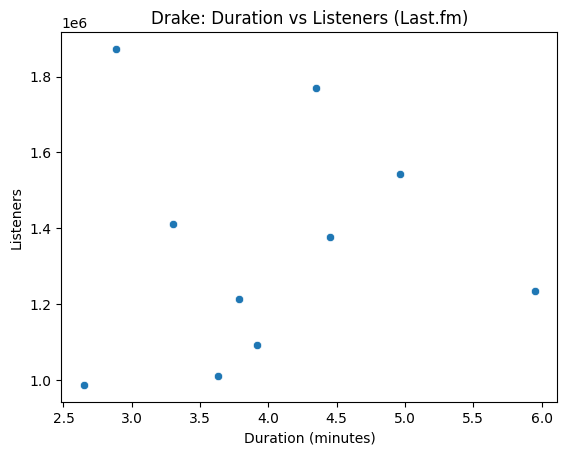

In [ ]:
plt.figure()
sns.scatterplot(data=df_clean, x="duration_min", y="listeners")
plt.title(f"{artist_name}: Duration vs Listeners (Last.fm)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Listeners")
plt.show()

My conclusion on the scatter plot: There is a little bit of trend between listners and duration of tracks; not that strong, though). There were also a few outliers- the 5 minutes and 6.0 minutes, also the track above 1.8 listners. 